<a href="https://colab.research.google.com/github/2015pushkar/Haberman-Cancer-Survival-Data-Analysis/blob/main/Haberman_cancer_survival.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#import warnings
# we are reading the data directly from raw github link
# we are also defining the name of the columns.
df=pd.read_csv('https://raw.githubusercontent.com/humblefool02/Haberman_dataset/main/haberman.csv',names=["age","operation_Year","axil_nodes","survival_status"])
df

,age,operation_Year,axil_nodes,survival_status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1
...,...,...,...,...
301,75,62,1,1
302,76,67,0,1
303,77,65,3,1
304,78,65,1,2


In [ ]:
print(df.shape)

(306, 4)


In [ ]:
print(df.columns)

Index(['age', 'operation_Year', 'axil_nodes', 'survival_status'], dtype='object')


In [ ]:
# Data  points per class
print(df['survival_status'].value_counts())
print('1 => 225 people, Survived 5 years or longer')
print('2 => 81 people, Died within 5 years')

1    225
2     81
Name: survival_status, dtype: int64
1 => 225 people, Survived 5 years or longer
2 => 81 people, Died within 5 years


 >**Haberman cancer survival is an Unbalanced Dataset**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   age              306 non-null    int64
 1   operation_Year   306 non-null    int64
 2   axil_nodes       306 non-null    int64
 3   survival_status  306 non-null    int64
dtypes: int64(4)
memory usage: 9.7 KB


In [ ]:
df.describe()

,age,operation_Year,axil_nodes,survival_status
count,306.000000,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144,1.264706
std,10.803452,3.249405,7.189654,0.441899
min,30.000000,58.000000,0.000000,1.000000
25%,44.000000,60.000000,0.000000,1.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,60.750000,65.750000,4.000000,2.000000
max,83.000000,69.000000,52.000000,2.000000


### 1.2 - Explain the objective of the problem.
(The objective for a problem can be defined as a brief explanation of problem that you are trying to solve using the given dataset)

# ***My Oberservations from the Datasets:***
   <p>The dataset contains cases from a study that was conducted between 1958 and 1970 at the University of Chicago's Billings Hospital on the survival of patients who had undergone surgery for breast cancer.</p>
   
   > 1. Age of patient at time of operation (numerical)
   > 2. Patient's year of operation (year - 1900, numerical)
   > 3. Number of positive axillary nodes detected (numerical)
   >> *A positive axillary node is a lymph node in the area of the armpit (axilla) to which cancer has spread. This spread is determined by surgically removing some of the lymph nodes and examining them under a microscope to see whether cancer cells are present.*
   > 4. Survival status (class attribute)
   >>  1. 1 = the patient survived 5 years or longer
   >>  2. 2 = the patient died within 5 year

   Information collected from <https://archive.ics.uci.edu/ml/datasets/Haberman's+Survival>

### 1.3 Perform Univariate analysis - Plot PDF, CDF, Boxplot, Voilin plots
- Plot the required charts to understand which feature are important for classification.
- Make sure that you add titles, legends and labels for each and every plots.
- Suppress the warnings you get in python, in that way it makes your notebook more presentable. 
- Do write observations/inference for each plot.

In [ ]:
survived_1 = df.loc[df['survival_status'] == 1] # Copying the survived people datapoints into 'survived_1'
died_2 = df.loc[df['survival_status'] == 2] #copying the died people datapoints into 'died_2


In [ ]:
survived_1,died_2

(     age  operation_Year  axil_nodes  survival_status
 0     30              64           1                1
 1     30              62           3                1
 2     30              65           0                1
 3     31              59           2                1
 4     31              65           4                1
 ..   ...             ...         ...              ...
 298   73              68           0                1
 300   74              63           0                1
 301   75              62           1                1
 302   76              67           0                1
 303   77              65           3                1
 
 [225 rows x 4 columns],      age  operation_Year  axil_nodes  survival_status
 7     34              59           0                2
 8     34              66           9                2
 24    38              69          21                2
 34    39              66           0                2
 43    41              60          23  

In [ ]:
print('survived people:',survived_1.shape)
print('died people:',died_2.shape)

survived people: (225, 4)
died people: (81, 4)


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f954fc3a190>]],
      dtype=object)

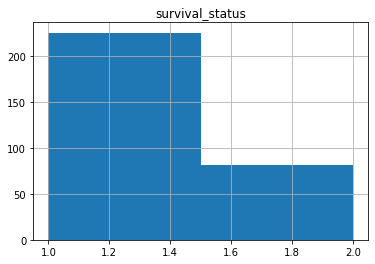

In [ ]:
df.hist(column='survival_status', bins=2)

1. >1 = the patient survived 5 years or longer
2. >2 = the patient died within 5 year

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


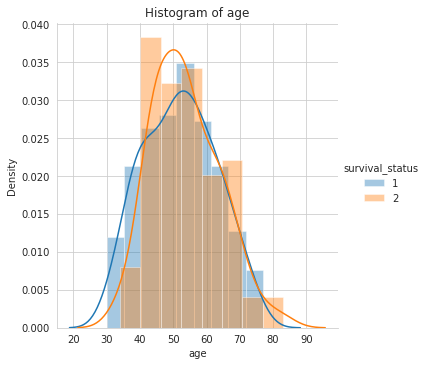

In [ ]:
sns.set_style("whitegrid");
a = sns.FacetGrid(df, hue="survival_status", size=5) 
a.map(sns.distplot, "age") 
a.add_legend()
plt.title('Histogram of age')
plt.show();

> 'Age': People between age {35<age<75} have suffered the most beacause of cancer

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


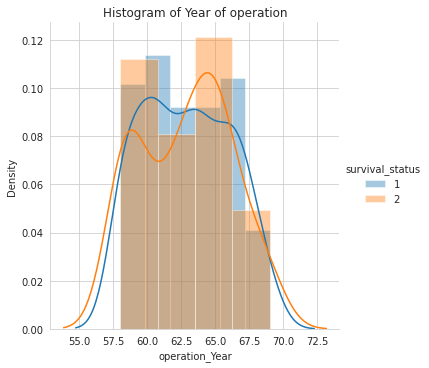

In [ ]:
b = sns.FacetGrid(df, hue="survival_status", size=5) 
b.map(sns.distplot, "operation_Year") 
b.add_legend()
plt.title('Histogram of Year of operation')
plt.show();

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


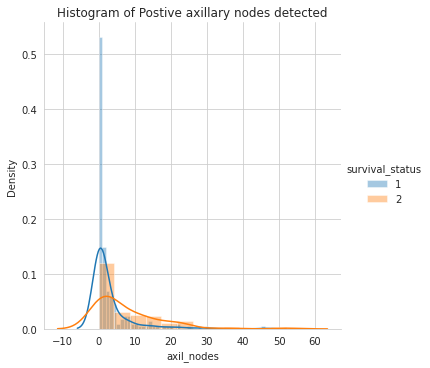

In [ ]:
b = sns.FacetGrid(df, hue="survival_status", size=5) 
b.map(sns.distplot, "axil_nodes") 
b.add_legend()
plt.title('Histogram of Postive axillary nodes detected')
plt.show();

Survived people pdf: [0.05333333 0.10666667 0.12444444 0.09333333 0.16444444 0.16444444
 0.09333333 0.11111111 0.06222222 0.02666667]
Survived people cdf: [0.05333333 0.16       0.28444444 0.37777778 0.54222222 0.70666667
 0.8        0.91111111 0.97333333 1.        ]
# Survived people points1: [0.01134752 0.02269504 0.02647754 0.01985816 0.03498818 0.03498818
 0.01985816 0.02364066 0.01323877 0.00567376]
Survived people bin_edges1: [30.  34.7 39.4 44.1 48.8 53.5 58.2 62.9 67.6 72.3 77. ]
Survived people pdf: [0.83555556 0.08       0.02222222 0.02666667 0.01777778 0.00444444
 0.00888889 0.         0.         0.00444444]
Survived people cdf: [0.83555556 0.91555556 0.93777778 0.96444444 0.98222222 0.98666667
 0.99555556 0.99555556 0.99555556 1.        ]
# Survived people points1: [0.18164251 0.0173913  0.00483092 0.0057971  0.00386473 0.00096618
 0.00193237 0.         0.         0.00096618]
Survived people bin_edges1: [ 0.   4.6  9.2 13.8 18.4 23.  27.6 32.2 36.8 41.4 46. ]
Survived peopl

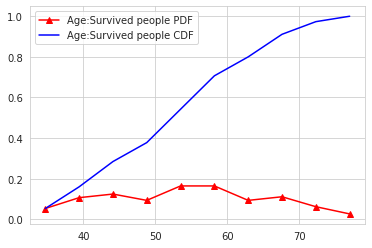

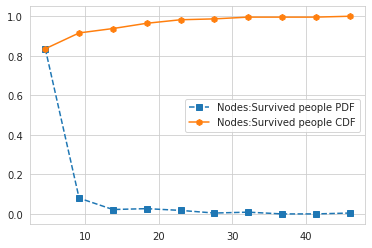

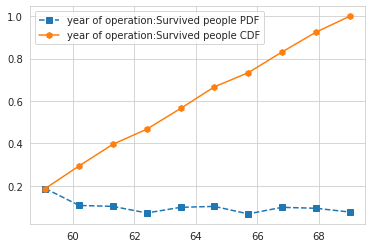

In [ ]:
counts,bin_edges = np.histogram(survived_1['age'], bins=10, density = True)
pdf = counts/sum(counts)
cdf = np.cumsum(pdf)
print('Survived people pdf:',pdf)
print('Survived people cdf:',cdf)
#print('bin_edges:',bin_edges)
plt.figure(1)
plt.plot(bin_edges[1:],pdf,'r^-')
plt.plot(bin_edges[1:],cdf,'b-')
plt.legend(['Age:Survived people PDF','Age:Survived people CDF'])
print('# Survived people points1:',counts)
print('Survived people bin_edges1:',bin_edges)


counts,bin_edges = np.histogram(survived_1['axil_nodes'], bins=10, density = True)
pdf = counts/sum(counts)
cdf = np.cumsum(pdf)
print('Survived people pdf:',pdf)
print('Survived people cdf:',cdf)
#print('bin_edges:',bin_edges)
plt.figure(2)
plt.plot(bin_edges[1:],pdf,'s--')
plt.plot(bin_edges[1:],cdf,'h-')
plt.legend(['Nodes:Survived people PDF','Nodes:Survived people CDF'])
print('# Survived people points1:',counts)
print('Survived people bin_edges1:',bin_edges)

counts,bin_edges = np.histogram(survived_1['operation_Year'], bins=10, density = True)
pdf = counts/sum(counts)
cdf = np.cumsum(pdf)
print('Survived people pdf:',pdf)
print('Survived people cdf:',cdf)
#print('bin_edges:',bin_edges)
plt.figure(3)
plt.plot(bin_edges[1:],pdf,'s--')
plt.plot(bin_edges[1:],cdf,'h-')
plt.legend(['year of operation:Survived people PDF','year of operation:Survived people CDF'])
print('# Survived people points1:',counts)
print('Survived people bin_edges1:',bin_edges)



1. > Age: 54<age<58 people having cancer has survived. At the age:54 almost 50% survived and at the age:58 almost 70% survived. Density of people having cancer is HIGH for 50<age<60
   > <p>At age>75 chance of survival is almost 90%, but the number of people are very less. </p>

2. >Positive Nodes is less than 10% then chance of survival INCREASES.

3. >less than 1960 the operations were conducted almost 20% of the time which was significantly INCREASED to 65% IN 1964 foloowed by INCREASED to 100% post 1968.

Dead people pdf: [0.03703704 0.12345679 0.19753086 0.19753086 0.13580247 0.12345679
 0.09876543 0.04938272 0.02469136 0.01234568]
Dead people cdf: [0.03703704 0.16049383 0.35802469 0.55555556 0.69135802 0.81481481
 0.91358025 0.96296296 0.98765432 1.        ]
# Dead people points1: [0.00755858 0.02519526 0.04031242 0.04031242 0.02771479 0.02519526
 0.02015621 0.01007811 0.00503905 0.00251953]
Dead people bin_edges1: [34.  38.9 43.8 48.7 53.6 58.5 63.4 68.3 73.2 78.1 83. ]
Dead people pdf: [0.56790123 0.14814815 0.13580247 0.04938272 0.07407407 0.
 0.01234568 0.         0.         0.01234568]
Dead people cdf: [0.56790123 0.71604938 0.85185185 0.90123457 0.97530864 0.97530864
 0.98765432 0.98765432 0.98765432 1.        ]
# Dead people points1: [0.10921178 0.02849003 0.02611586 0.00949668 0.01424501 0.
 0.00237417 0.         0.         0.00237417]
Dead  people bin_edges1: [ 0.   5.2 10.4 15.6 20.8 26.  31.2 36.4 41.6 46.8 52. ]
Dead people pdf: [0.25925926 0.04938272 0.03703704 0.08641975

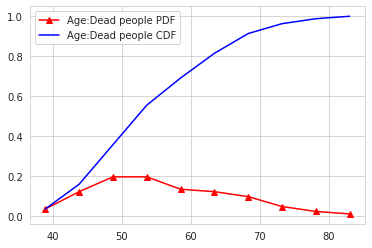

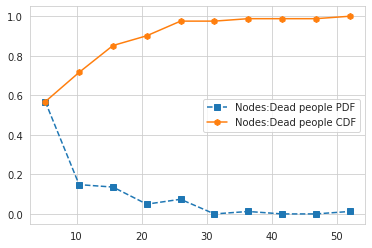

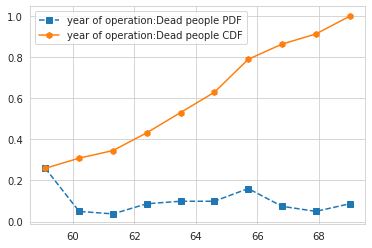

In [ ]:
counts,bin_edges = np.histogram(died_2['age'], bins=10, density = True)
pdf = counts/sum(counts)
cdf = np.cumsum(pdf)
print('Dead people pdf:',pdf)
print('Dead people cdf:',cdf)
#print('bin_edges:',bin_edges)
plt.figure(1)
plt.plot(bin_edges[1:],pdf,'r^-')
plt.plot(bin_edges[1:],cdf,'b-')
plt.legend(['Age:Dead people PDF','Age:Dead people CDF'])
print('# Dead people points1:',counts)
print('Dead people bin_edges1:',bin_edges)


counts,bin_edges = np.histogram(died_2['axil_nodes'], bins=10, density = True)
pdf = counts/sum(counts)
cdf = np.cumsum(pdf)
print('Dead people pdf:',pdf)
print('Dead people cdf:',cdf)
#print('bin_edges:',bin_edges)
plt.figure(2)
plt.plot(bin_edges[1:],pdf,'s--')
plt.plot(bin_edges[1:],cdf,'h-')
plt.legend(['Nodes:Dead people PDF','Nodes:Dead people CDF'])
print('# Dead people points1:',counts)
print('Dead  people bin_edges1:',bin_edges)

counts,bin_edges = np.histogram(died_2['operation_Year'], bins=10, density = True)
pdf = counts/sum(counts)
cdf = np.cumsum(pdf)
print('Dead people pdf:',pdf)
print('Dead people cdf:',cdf)
#print('bin_edges:',bin_edges)
plt.figure(3)
plt.plot(bin_edges[1:],pdf,'s--')
plt.plot(bin_edges[1:],cdf,'h-')
plt.legend(['year of operation:Dead people PDF','year of operation:Dead people CDF'])
print('# Dead people points1:',counts)
print('Dead  people bin_edges1:',bin_edges)




1. > The death rate between 48<age<53 is 20% and age>80, the death rate is almost 100%.
2. > The year of operation increased to 100% post 1968 and still the death rate increased to 100% for age>80

In [ ]:
survived_1.describe()



,age,operation_Year,axil_nodes,survival_status
count,225.000000,225.000000,225.000000,225.0
mean,52.017778,62.862222,2.791111,1.0
std,11.012154,3.222915,5.870318,0.0
min,30.000000,58.000000,0.000000,1.0
25%,43.000000,60.000000,0.000000,1.0
50%,52.000000,63.000000,0.000000,1.0
75%,60.000000,66.000000,3.000000,1.0
max,77.000000,69.000000,46.000000,1.0


> People who survived has a average Positive nodes detected to be around 2.79

In [ ]:
died_2.describe()

,age,operation_Year,axil_nodes,survival_status
count,81.000000,81.000000,81.000000,81.0
mean,53.679012,62.827160,7.456790,2.0
std,10.167137,3.342118,9.185654,0.0
min,34.000000,58.000000,0.000000,2.0
25%,46.000000,59.000000,1.000000,2.0
50%,53.000000,63.000000,4.000000,2.0
75%,61.000000,65.000000,11.000000,2.0
max,83.000000,69.000000,52.000000,2.0


>People who died has a average Positive nodes detected around 7.4

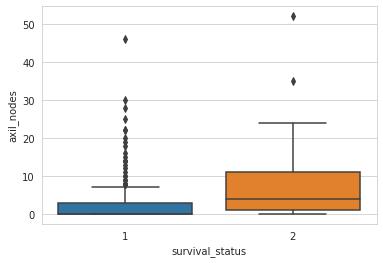

In [ ]:
#Boxplot

sns.boxplot(x='survival_status',y='axil_nodes', data=df)
plt.show()

> People having axil nodes around
  >>50% people having axil nodes around 5 have died and around 75% people died for 8<nodes<10

  >> People having axil nodes > 15 has a less chance of survival, but still NOT IMPOSSIBLE.

  >> Mostly they do operations at early stage of cancer itself where Nodes detection value < 10

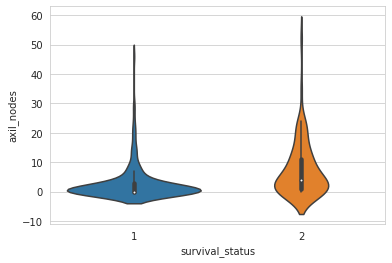

In [ ]:
#Violin plots combines the benefits of the Histogram and Box plot
sns.violinplot(x="survival_status", y="axil_nodes", data=df, size=8)
plt.show()

### 1.4 Perform Bivariate analysis - Plot 2D Scatter plots and Pair plots
- Plot the required Scatter plots and Pair plots of different features to see which combination of features are useful for clasification task
- Make sure that you add titles, legends and labels for each and every plots.
- Suppress the warnings you get in python, in that way it makes your notebook more presentable. 
- Do write observations/inference for each  plot.


/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


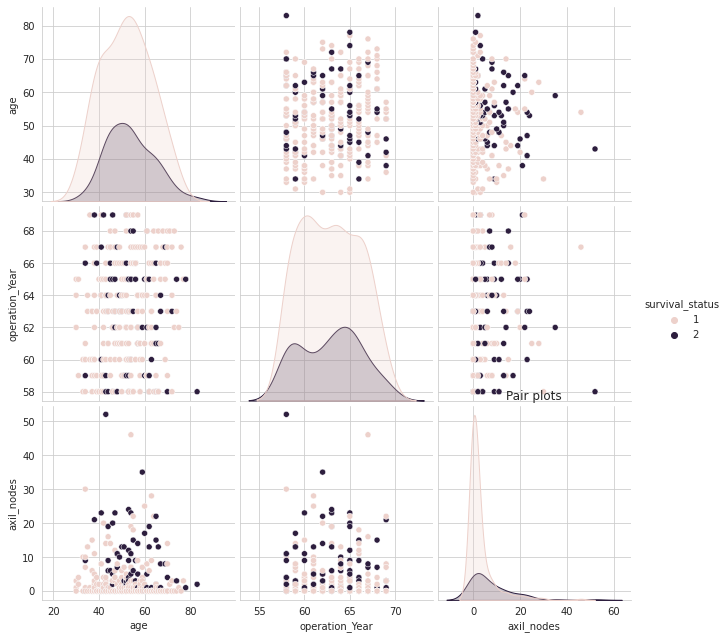

In [ ]:
plt.close();
sns.set_style("whitegrid");
sns.pairplot(df, hue="survival_status", size=3); # As their are 3 features/attributes so 3C2 = 3 ways
plt.title('Pair plots')
plt.show()

It is highly unlikely to separate or draw a hyperplane between the survived and death people in all combinations.

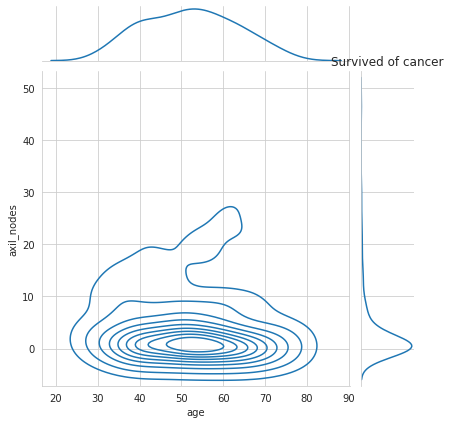

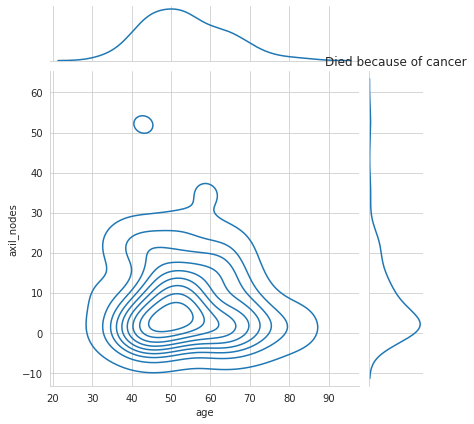

In [ ]:
sns.jointplot(x="age", y="axil_nodes", data=survived_1, kind="kde");
plt.figure(1)
plt.title('Survived of cancer')
#plt.show();

sns.jointplot(x="age", y="axil_nodes", data=died_2, kind="kde");
plt.figure(2)
plt.title('Died because of cancer')
plt.show();

> People died because of cancer tend to have higher axil_nodes and very less chance of survival.

> for axil_nodes>10 have very very less chance of survival but NOT IMPOSSIBLE.

In [ ]:
survived_1.describe()



,age,operation_Year,axil_nodes,survival_status
count,225.000000,225.000000,225.000000,225.0
mean,52.017778,62.862222,2.791111,1.0
std,11.012154,3.222915,5.870318,0.0
min,30.000000,58.000000,0.000000,1.0
25%,43.000000,60.000000,0.000000,1.0
50%,52.000000,63.000000,0.000000,1.0
75%,60.000000,66.000000,3.000000,1.0
max,77.000000,69.000000,46.000000,1.0


> People who survived has a average Positive nodes detected to be around 2.79

In [ ]:
died_2.describe()

,age,operation_Year,axil_nodes,survival_status
count,81.000000,81.000000,81.000000,81.0
mean,53.679012,62.827160,7.456790,2.0
std,10.167137,3.342118,9.185654,0.0
min,34.000000,58.000000,0.000000,2.0
25%,46.000000,59.000000,1.000000,2.0
50%,53.000000,63.000000,4.000000,2.0
75%,61.000000,65.000000,11.000000,2.0
max,83.000000,69.000000,52.000000,2.0


>People who died has a average Positive nodes detected around 7.4

#Conclusion
1. ***Age and axil_nodes are the most important features.***
2. ***People died because of cancer tend to have higher axil_nodes and very less chance of survival. For axil_nodes>10 have very very less chance of survival but NOT IMPOSSIBLE.***

##Age
1. > ***The death rate between 48<age<53 is 20% and age>80, the death rate is almost 100%.***
2. > ***The year of operation increased to 100% post 1968 and still the death rate increased to 100% for age>80.*** 

##People having axil nodes around
1. >***50% people having axil nodes around 5 have died and around 75% people died for 8<nodes<10***

2. >***People having axil nodes > 15 has a less chance of survival, but still NOT IMPOSSIBLE.***

3. > ***Mostly they do operations at early stage of cancer itself where Nodes detection value < 10, which increases the chance of survival.***